In [48]:
import pandas as pd
import numpy as np

In [49]:
# Load the dataset
data = pd.read_csv(r'C:\Users\Hp\Desktop\solar_data.csv',encoding="unicode_escape")

In [55]:
#Columns:
#1.	altitude_m: Altitude above sea level in meters. 
#2.	dayl_s:  "Day Length" measured in seconds. It represents the total duration of daylight in a given day.
#3.	prcp_mm_d: This stands for "Precipitation" measured in millimeters per day. 
#4.	sradW_m: This stands for "Solar Radiation" measured in watts per square meter (W/m²). It quantifies the amount of solar energy received at a specific location.
#5.	swe_kg_m: This stands for "Snow Water Equivalent" measured in kilograms per square meter (kg/m²). It represents the amount of water contained within snowpack, which can affect albedo and thus influence solar radiation absorption.
#6.	tmax_deg: Maximum temperature of the day measured in degrees 
#7.	tmindeg: Minimum temperature of the day
#8.	vpPa:"Vapor pressure" measured in pascals (Pa). 
#9.	capacity_f  “Capacity factor” a measure of how effectively a power generation system operates compared to its maximum potential output over a specific period of time

In [51]:
# Clean all numeric columns by removing any spaces and converting them to floats
numeric_columns = ['altitude_m', 'dayl_s', 'prcp_mm_d', 'sradW_m', 'swe_kg_m', 'tmax_deg', 'tmindeg', 'vpPa', 'capacity_f']

for col in numeric_columns:
    # Remove spaces if any, and convert the column to float
    data[col] = data[col].astype(str).str.replace(" ", "").astype(float)

# Confirm if there are any remaining non-numeric entries
for col in numeric_columns:
    # Identify rows that couldn't be converted to float
    non_numeric_rows = data[pd.to_numeric(data[col], errors='coerce').isna()]
    if not non_numeric_rows.empty:
        print(f"Issues found in column '{col}':")
        print(non_numeric_rows[col])

Mean Squared Error: 0.01
R-squared: 0.98


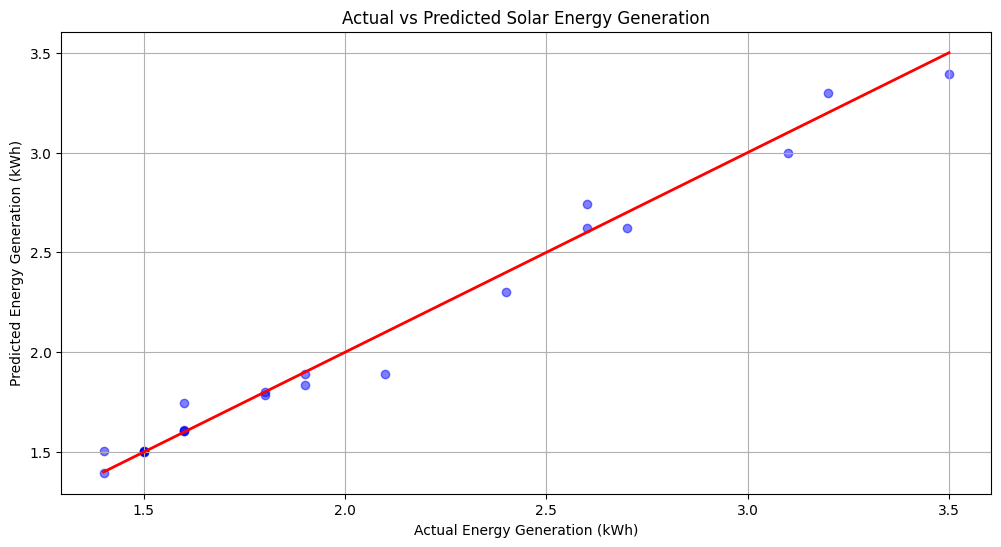

Current Carbon Footprint: 22.40 kg CO2


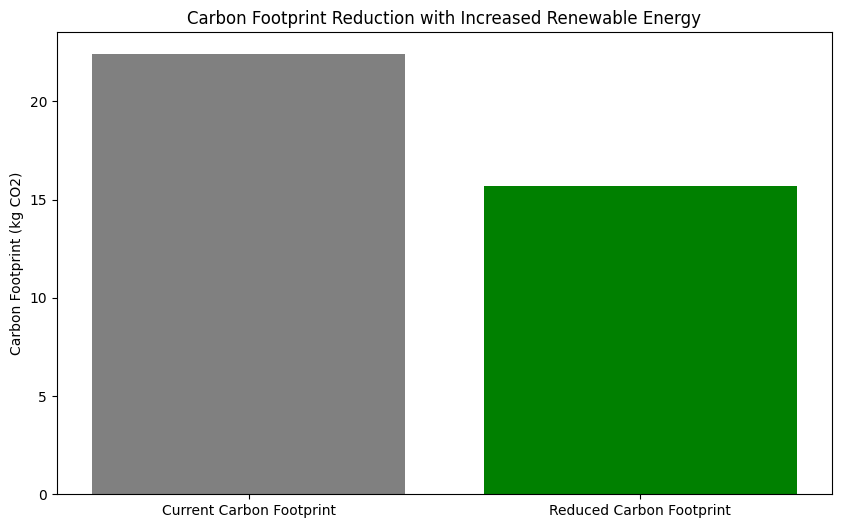

Reduced Carbon Footprint with 30.0% renewable energy: 15.68 kg CO2


In [52]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Select features and target variable
features = ['altitude_m', 'dayl_s', 'prcp_mm_d', 'sradW_m', 'swe_kg_m', 'tmax_deg', 'tmindeg', 'vpPa']
target = 'capacity_f'  # Assuming this is the target variable for energy generation

# Handle missing values (if any)
data = data.dropna(subset=features + [target])

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line for perfect prediction
plt.title('Actual vs Predicted Solar Energy Generation')
plt.xlabel('Actual Energy Generation (kWh)')
plt.ylabel('Predicted Energy Generation (kWh)')
plt.grid()
plt.show()

# Example carbon intensity (in kg CO2/kWh)
carbon_intensity = 0.5  # Adjust this value based on your region

# Calculate total energy generated
total_energy_generated = y_test.sum()  # Total energy from the test set

# Calculate current carbon footprint
carbon_footprint_current = total_energy_generated * carbon_intensity
print(f'Current Carbon Footprint: {carbon_footprint_current:.2f} kg CO2')

# Hypothetical scenario: Reducing carbon footprint by using renewables
# Assume a 30% renewable energy usage, which reduces the footprint by 30%
renewable_percentage = 0.3
reduced_carbon_footprint = carbon_footprint_current * (1 - renewable_percentage)

# Plot the carbon footprint comparison
plt.figure(figsize=(10, 6))
plt.bar(['Current Carbon Footprint', 'Reduced Carbon Footprint'], 
        [carbon_footprint_current, reduced_carbon_footprint], color=['gray', 'green'])
plt.title('Carbon Footprint Reduction with Increased Renewable Energy')
plt.ylabel('Carbon Footprint (kg CO2)')
plt.show()

print(f'Reduced Carbon Footprint with {renewable_percentage*100}% renewable energy: {reduced_carbon_footprint:.2f} kg CO2')


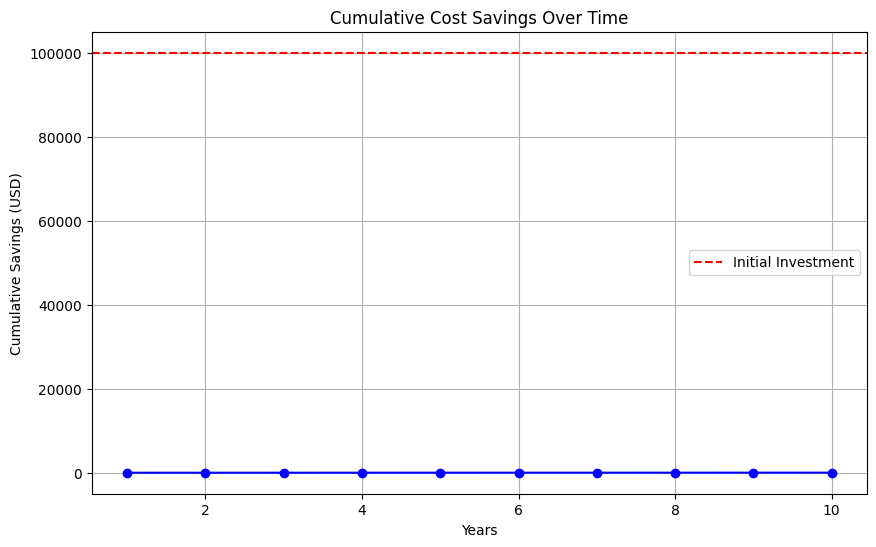

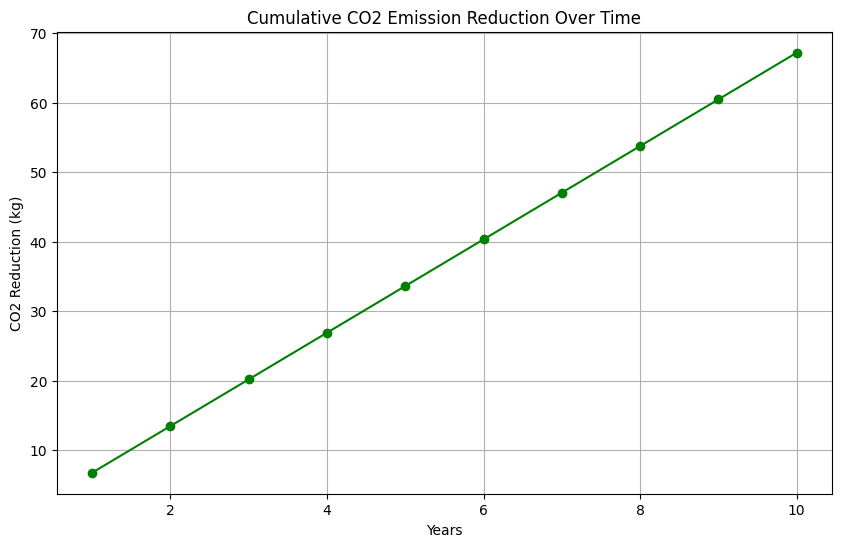

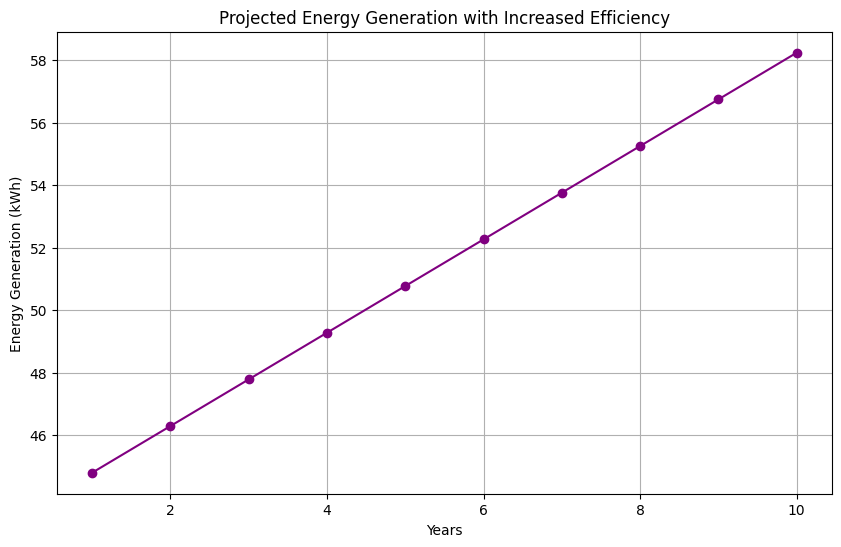

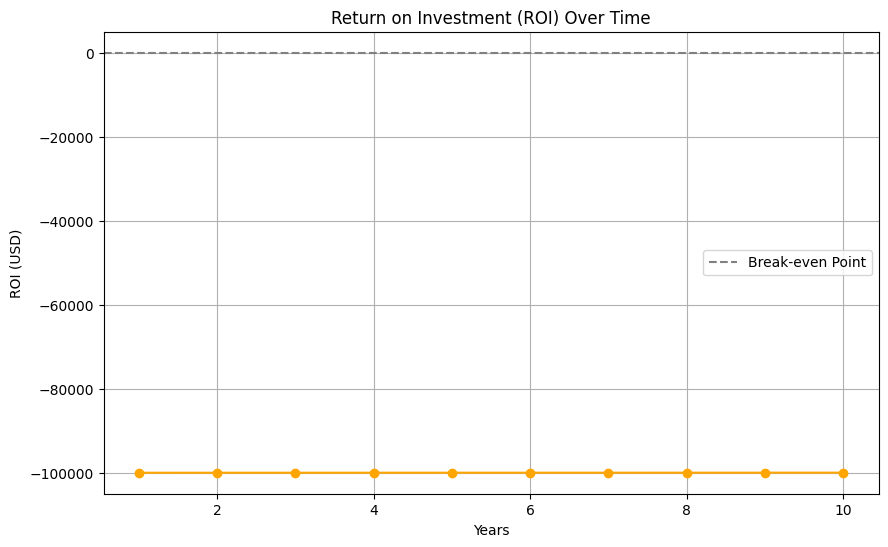

In [53]:
import numpy as np

# Assume initial investment cost in renewable infrastructure
initial_investment = 100000  # Example amount in dollars

# Assume energy cost (e.g., per kWh) and savings rate due to renewables
energy_cost_per_kwh = 0.12  # Example cost per kWh in dollars
savings_rate = 0.3  # Assuming 30% savings by using renewable energy

# Calculate cost savings over a time period (e.g., 10 years)
years = np.arange(1, 11)  # 10-year period
annual_energy_generated = total_energy_generated  # Example, could vary per year
annual_savings = annual_energy_generated * energy_cost_per_kwh * savings_rate
cumulative_savings = np.cumsum([annual_savings] * len(years))

# Plot cumulative cost savings over time
plt.figure(figsize=(10, 6))
plt.plot(years, cumulative_savings, marker='o', color='blue')
plt.axhline(y=initial_investment, color='red', linestyle='--', label='Initial Investment')
plt.title('Cumulative Cost Savings Over Time')
plt.xlabel('Years')
plt.ylabel('Cumulative Savings (USD)')
plt.legend()
plt.grid()
plt.show()

# Projected CO2 emission reductions over time
cumulative_co2_reduction = np.cumsum([carbon_footprint_current * savings_rate] * len(years))

plt.figure(figsize=(10, 6))
plt.plot(years, cumulative_co2_reduction, marker='o', color='green')
plt.title('Cumulative CO2 Emission Reduction Over Time')
plt.xlabel('Years')
plt.ylabel('CO2 Reduction (kg)')
plt.grid()
plt.show()

# Energy Generation Efficiency trend (Simulating an increase in efficiency)
efficiency = np.linspace(1, 1.3, len(years))  # Assume a gradual efficiency increase to 130%
projected_energy_generated = annual_energy_generated * efficiency

plt.figure(figsize=(10, 6))
plt.plot(years, projected_energy_generated, marker='o', color='purple')
plt.title('Projected Energy Generation with Increased Efficiency')
plt.xlabel('Years')
plt.ylabel('Energy Generation (kWh)')
plt.grid()
plt.show()

# ROI projection
roi = cumulative_savings - initial_investment
plt.figure(figsize=(10, 6))
plt.plot(years, roi, marker='o', color='orange')
plt.axhline(0, color='gray', linestyle='--', label='Break-even Point')
plt.title('Return on Investment (ROI) Over Time')
plt.xlabel('Years')
plt.ylabel('ROI (USD)')
plt.legend()
plt.grid()
plt.show()


In [54]:
print(X_train)

     altitude_m   dayl_s  prcp_mm_d  sradW_m  swe_kg_m  tmax_deg  tmindeg  \
65       1000.0  36400.0        0.0      8.8       0.0      34.1     18.1   
26       1100.0  35600.0        1.5      6.7       0.0      30.7     15.7   
22        700.0  35500.0        0.0      7.7       0.0      32.2     16.2   
31        600.0  35800.0        1.0      6.3       0.0      29.4     14.4   
47       1200.0  36100.0        2.0      5.4       0.0      29.9     14.9   
..          ...      ...        ...      ...       ...       ...      ...   
71        600.0  35800.0        1.5      6.7       0.0      30.2     15.2   
14        900.0  35900.0        2.5      5.9       0.0      31.5     13.0   
92        700.0  35500.0        0.0      8.4       0.0      33.6     17.6   
51        600.0  35800.0        1.5      6.5       0.0      29.8     14.8   
102       700.0  35500.0        0.5      8.5       0.0      33.8     17.8   

       vpPa  
65   1430.0  
26   1260.0  
22   1310.0  
31   1115.0  
47   